### Esse capítulo mostra duas técnicas mais avançadas para imputações de dados faltantes. Agora os valores faltantes serão preditos baseados nas outras colunas. Os métodos são:
1. KNN: Método encontra os K vizinhos mais próximos através de alguma métrica. Então, o valor predito será a média dos valores não faltantes.
2. MICE: Método ajusta várias regressões lineares múltiplas considerando a variável do valor faltante como target e depois tira uma média para a imputação do mesmo.

In [20]:
import pandas as pd
from fancyimpute import KNN, IterativeImputer
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [3]:
diabetes=pd.read_csv("../dados/pima-indians-diabetes data.csv", sep=",")
diabetes

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


In [4]:
diabetes.isna().mean()

Pregnant             0.000000
Glucose              0.006510
Diastolic_BP         0.045573
Skin_Fold            0.295573
Serum_Insulin        0.486979
BMI                  0.014323
Diabetes_Pedigree    0.000000
Age                  0.000000
Class                0.000000
dtype: float64

### KNN

In [5]:
knn_imputer = KNN()
diabetes_knn = diabetes.copy()
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

Imputing row 1/768 with 1 missing, elapsed time: 0.106
Imputing row 101/768 with 2 missing, elapsed time: 0.106
Imputing row 201/768 with 1 missing, elapsed time: 0.106
Imputing row 301/768 with 3 missing, elapsed time: 0.106
Imputing row 401/768 with 2 missing, elapsed time: 0.106
Imputing row 501/768 with 0 missing, elapsed time: 0.106
Imputing row 601/768 with 1 missing, elapsed time: 0.106
Imputing row 701/768 with 0 missing, elapsed time: 0.121


In [6]:
diabetes_knn.isna().mean()

Pregnant             0.0
Glucose              0.0
Diastolic_BP         0.0
Skin_Fold            0.0
Serum_Insulin        0.0
BMI                  0.0
Diabetes_Pedigree    0.0
Age                  0.0
Class                0.0
dtype: float64

### MICE(Multiple Imputations by Chained Equations)

In [7]:
MICE_imputer = IterativeImputer()
diabetes_MICE = diabetes.copy()
diabetes_MICE.iloc[:, :] = MICE_imputer.fit_transform(diabetes_MICE)

In [8]:
diabetes_MICE.isna().mean()

Pregnant             0.0
Glucose              0.0
Diastolic_BP         0.0
Skin_Fold            0.0
Serum_Insulin        0.0
BMI                  0.0
Diabetes_Pedigree    0.0
Age                  0.0
Class                0.0
dtype: float64

In [9]:
diabetes.isna().mean()

Pregnant             0.000000
Glucose              0.006510
Diastolic_BP         0.045573
Skin_Fold            0.295573
Serum_Insulin        0.486979
BMI                  0.014323
Diabetes_Pedigree    0.000000
Age                  0.000000
Class                0.000000
dtype: float64

### Dados com exclusão de todos os valores faltantes

In [10]:
diabetes_cc = diabetes.dropna(how='any')

### Imputação com média em todas as variáveis

In [11]:
mean_imputer=SimpleImputer(strategy="mean")

In [12]:
diabetes_mean=diabetes.copy()
diabetes_mean.iloc[:,:]=mean_imputer.fit_transform(diabetes)

In [13]:
diabetes_mean.isna().mean()

Pregnant             0.0
Glucose              0.0
Diastolic_BP         0.0
Skin_Fold            0.0
Serum_Insulin        0.0
BMI                  0.0
Diabetes_Pedigree    0.0
Age                  0.0
Class                0.0
dtype: float64

### Comparação gráfica da variável Skin Fold

Text(0.5, 0, 'Skin Fold')

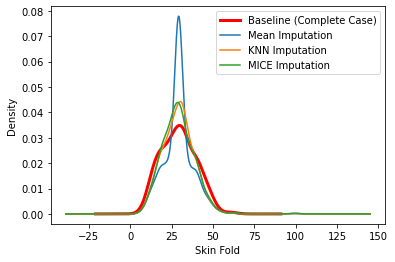

In [14]:
diabetes_cc['Skin_Fold'].plot(kind='kde', c='red', linewidth=3)
diabetes_mean['Skin_Fold'].plot(kind='kde')
diabetes_knn['Skin_Fold'].plot(kind='kde')
diabetes_MICE['Skin_Fold'].plot(kind='kde')
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'KNN Imputation',
'MICE Imputation']
plt.legend(labels)
plt.xlabel('Skin Fold')

### Comparação com a performance da Regressão Logística

In [15]:
diabetes.columns

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

In [19]:
diabetes["Class"].value_counts()/len(diabetes)

0.0    0.651042
1.0    0.348958
Name: Class, dtype: float64

In [24]:
# Dados completos
X=diabetes_cc.drop(["Class"], axis=1)
y=diabetes_cc["Class"]
lr_cc=LogisticRegression().fit(X, y)
f1_score_cc=f1_score(y, lr_cc.predict(X))

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Imputação com média
X=diabetes_mean.drop(["Class"], axis=1)
y=diabetes_mean["Class"]
lr_mean=LogisticRegression().fit(X, y)
f1_score_mean=f1_score(y, lr_mean.predict(X))

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Imputação KNN
X=diabetes_knn.drop(["Class"], axis=1)
y=diabetes_knn["Class"]
lr_knn=LogisticRegression().fit(X, y)
f1_score_knn=f1_score(y, lr_knn.predict(X))

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Imputação MICE
X=diabetes_MICE.drop(["Class"], axis=1)
y=diabetes_MICE["Class"]
lr_mice=LogisticRegression().fit(X, y)
f1_score_mice=f1_score(y, lr_mice.predict(X))

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Métrica F1 Score para todas as imputações comparativamente com os dados completos

In [29]:
print(pd.DataFrame({"Dados completos": f1_score_cc,
                   "Imputação com média": f1_score_mean,
                   "Imputação com KNN": f1_score_knn,
                   "Imputação com MICE": f1_score_mice}, index=["F1 Score"]))

          Dados completos  Imputação com média  Imputação com KNN  \
F1 Score         0.631111             0.633333           0.641509   

          Imputação com MICE  
F1 Score            0.631579  
